# Fuzzy C-Means Report


### Team Members:

1- Abanoub Samir Girgis | ID: 20190001

2- Aram Gamal Youssef     | ID: 20190083

# Diabetes Dataset

### Pima Indians Diabetes data

#### We used this dataset to detect if the patients had positive or negative diabetes tests.

- Number of Instances: 768

- Number of Attributes: 8 plus class

- For Each Attribute: (all numeric-valued)

    -  Number of times pregnant
    -  Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    -  Diastolic blood pressure (mm Hg)
    -  Triceps skin fold thickness (mm)
    -  2-Hour serum insulin (mu U/ml)
    -  Body mass index (weight in kg/(height in m)^2)
    -  Diabetes pedigree function
    -  Age (years)
    -  Class variable (class value 1 is "tested positive for diabetes", class value 0 is "tested negative for diabetes")


- Brief statistical analysis:


    - Attribute number: Mean: Standard Deviation:
                3.8     3.4
              120.9    32.0
               69.1    19.4
               20.5    16.0
               79.8   115.2
               32.0     7.9
                0.5     0.3
               33.2    11.8

# Loading Dataset

In [1]:
import pandas as pd
df=pd.read_csv("diabetes_dataset.csv")
df

,preg,plas,pres,skin,insu,mass,predi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,tested_negative
764,2,122,70,27,0,36.8,0.340,27,tested_negative
765,5,121,72,23,112,26.2,0.245,30,tested_negative
766,1,126,60,0,0,30.1,0.349,47,tested_positive


### Drop labels from dataset

In [2]:
df['class'] = df['class'].replace(['tested_positive'],1)
df['class'] = df['class'].replace(['tested_negative'],0)
labels=df['class']
df.drop("class",axis=1,inplace=True)

In [3]:
labels

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64

# Data Visualization

/home/abanoub/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


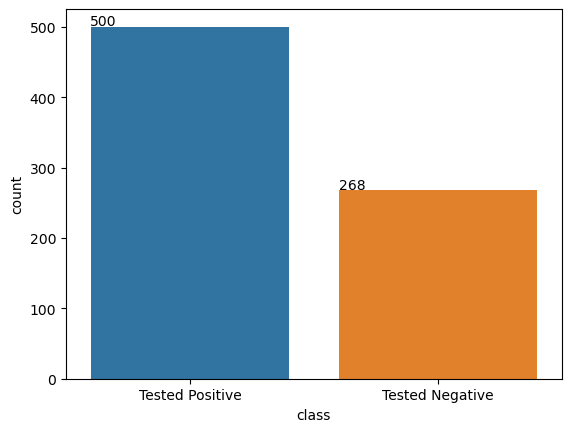

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
col=['Tested Positive','Tested Negative']
ax = sns.countplot(labels)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
x = np.arange(2) 
ax.set_xticks(x, col)
plt.show()

# Check Outliers

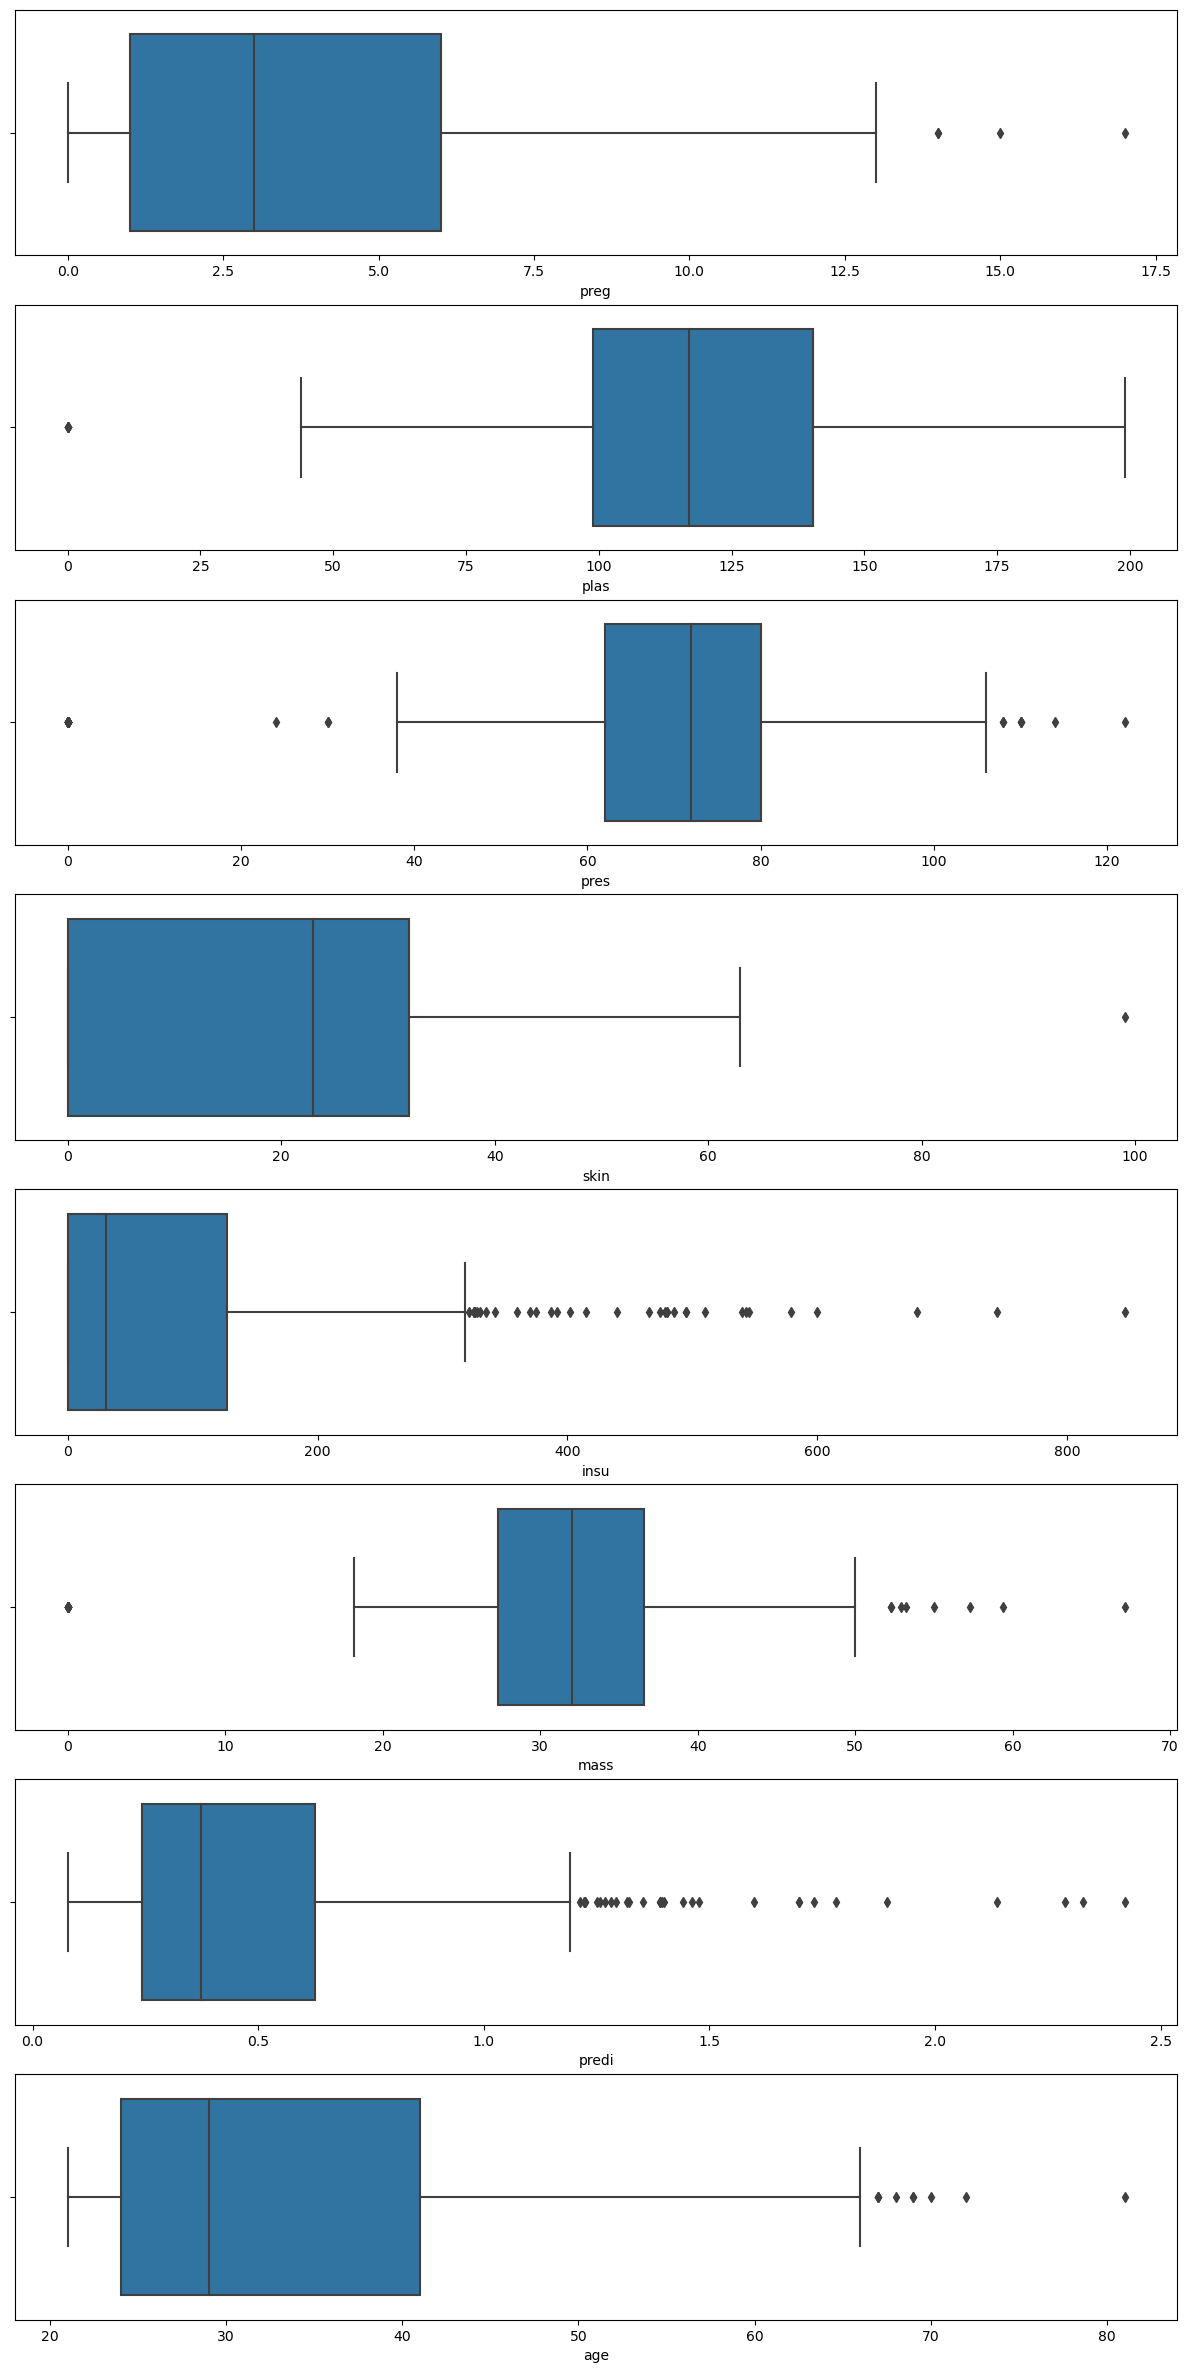

In [5]:
import seaborn as sns
num_cols =['preg','plas','pres','skin','insu','mass','predi','age']
fig, ax = plt.subplots(8, 1, figsize=(15,30))
for i in range(8):
    sns.boxplot(x = df[num_cols[i]], ax=ax[i])

I used Interquartile Range Method to remove the outliers.

We can use the IQR method of identifying outliers to set up a “fence” outside of Q1 and Q3. Any values that fall outside of this fence are considered outliers. To build this fence we take 1.5 times the IQR and then subtract this value from Q1 and add this value to Q3. This gives us the minimum and maximum fence posts that we compare each observation to. Any observations that are more than 1.5 IQR below Q1 or more than 1.5 IQR above Q3 are considered outliers.

In [7]:
df2=df.copy()

In [8]:
for col in num_cols:
  # calculate interquartile range
  Q1 = df2[col].quantile(0.25)
  Q3 = df2[col].quantile(0.75)
  IQR = Q3 - Q1
  #calculate the outlier cutoff
  S = 1.5*IQR
  LB = Q1 - S
  UB = Q3 + S
  # identify outliers
  df2.loc[df2[col] > UB,col] = UB
  # remove outliers
  df2.loc[df2[col] < LB,col] = LB

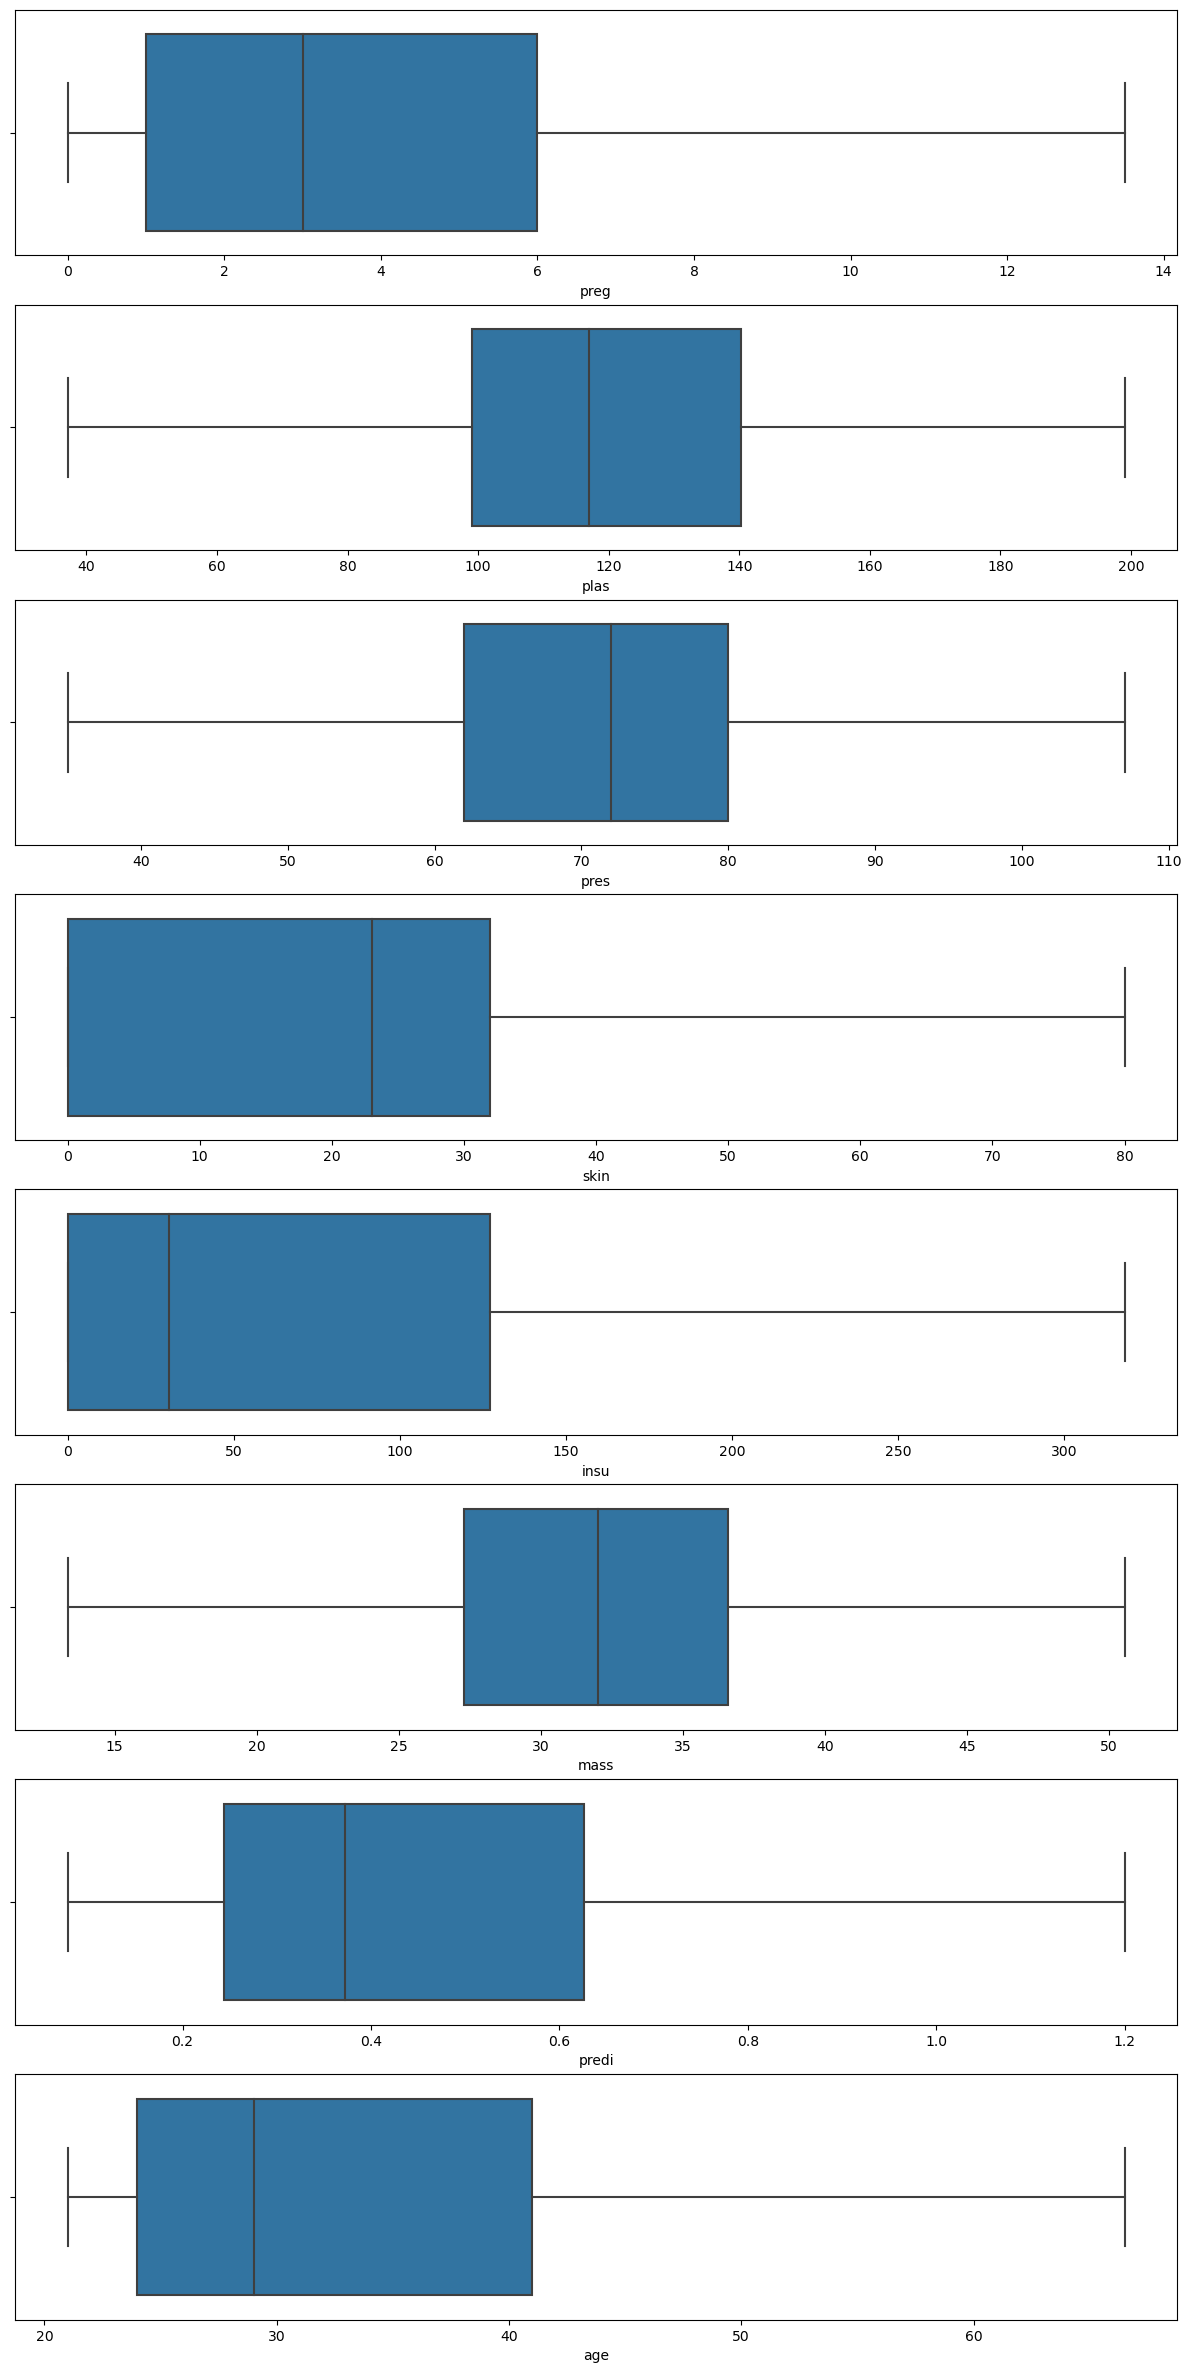

In [9]:
import seaborn as sns
num_cols =['preg','plas','pres','skin','insu','mass','predi','age']
fig, ax = plt.subplots(8, 1, figsize=(15,30))
for i in range(8):
    sns.boxplot(x = df2[num_cols[i]], ax=ax[i])

### Normalize the dataset

In [10]:
from sklearn.preprocessing import StandardScaler
scalarModel = StandardScaler()
df = scalarModel.fit_transform(df2)
df=pd.DataFrame(df,columns=['preg','plas','pres','skin','insu','mass','predi','age'])
df

,preg,plas,pres,skin,insu,mass,predi,age
0,0.647150,0.861926,0.092691,0.914986,-0.787602,0.209359,0.588927,1.445691
1,-0.848970,-1.159433,-0.330201,0.536065,-0.787602,-0.784254,-0.378101,-0.189304
2,1.245598,1.984903,-0.471166,-1.295388,-0.787602,-1.252672,0.746595,-0.103252
3,-0.848970,-1.031093,-0.330201,0.157144,0.217583,-0.571337,-1.022787,-1.049828
4,-1.148194,0.508990,-2.162737,0.914986,1.008900,1.557835,2.596563,-0.017199
...,...,...,...,...,...,...,...,...
763,1.844045,-0.646072,0.374620,1.735982,1.137221,0.109998,-1.008772,2.564372
764,-0.549746,0.027714,-0.048273,0.409758,-0.787602,0.663583,-0.416642,-0.533513
765,0.347926,-0.004371,0.092691,0.157144,0.410066,-0.841032,-0.749497,-0.275356
766,-0.848970,0.156054,-0.753094,-1.295388,-0.787602,-0.287447,-0.385109,1.187534


### PCA

Projecting 8-dimensional data to 2D


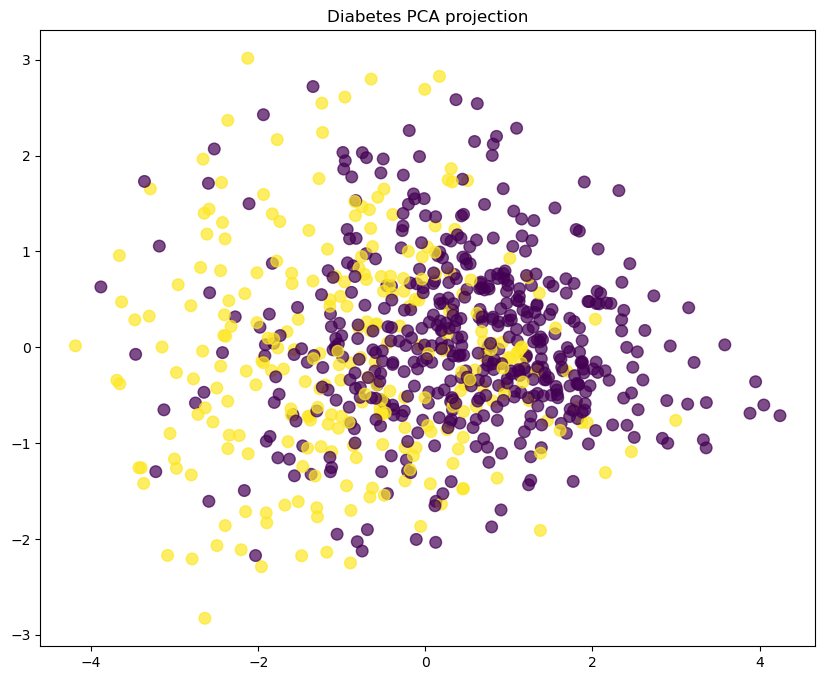

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X_reduced = pca.fit_transform(df)

print('Projecting %d-dimensional data to 2D' % df.shape[1])
plt.figure(figsize=(10,8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 3], s = 70,alpha = 0.7,c=labels,cmap='viridis');
plt.title('Diabetes PCA projection');